## Problem Framing & Big Picture

### Overview
This committee wants to find out what students would need help when it comes to their academic performance. We have the data from two high schools that contains the  background information of students. At the same time, we have their grades across two terms and the final third term for the subject of Mathematics. We have used the information that we have to create a model that can predict the grades of students based upon their background information. The idea is that when newer students enroll in next year, we can identify beforehand what students will need extra help to get better grades; thereby increasing the academic performance of students.
### Background on Machine Learning
Machine Learning often abbreviated by ML is creating a model using the available data so the machine can make predictions for future data. Some of the most common ML types are:

- Supervised Learning: where there is features (x-values) and labels (y-values). The data would be separated into a training set and testing set. The algorithm is trained on using the training set and once it has been completed, it is tested using the tested set.

- Unsupervised Learning: where the data is unlabeled and the algorithm has to identify patterns on its own. It does this by identifying patterns within the data and see if they can be grouped into clusters, identify outliers and as a result identify categories that we as humans cannot identify visually.

When creating the model, it has to be trained on the data. The most common methods of training on the data are:
- Online Learning: this is used when there is a constant supply of incoming data and the model adapts and trains on the incoming data and adapts to get better. This is more applicable in today's world where data is stored online and easier to access and real-time predictions are needed. They are used when the model has to flexibly adapt regularly.
- Offline Learning: the model is trained on a data set that is already given to it and is unable to learn from new data unless the model is trained from the beginning with the new data added to the training set. This means that unlike online learning, it has to be retrained. 

## What type of ML is this project based upon?
In this case, as we have various categories and final-term score for G3(labels), the type of ML method used is Supervised Learning. The training methodology for the data is batch learning (offline learning) as a dataset has been provided from two high schools. The plan is to separate this dataset into a training and testing dataset. The supervised model will be created on the training set and tested using the testing set.

ML models can predict data that is:
- Classification: where the predicted data is put into a category. It can be as simple as them being graded A,B,C and so forth.
- Regression: where the predicted data has a numerical value. This can be a value for the grade such as 95, 82, 71 and so forth.

Since the labeled data for G3 is a numerical value, this model will focus on regression.
### Model's Performance
Of course, the model has to predict data accurately. To check that the data is predicted correctly we will use both R2 and the mean squared error between the actual data from the training set and the predicted data.
### Additional Information
Note that this model can be updated later with more data for other classes. Currently, this model only used for the labeled data the grade for Mathematics. We are hoping that the grade for Mathematics will reflect similarly to grades of other subjects. If the data for those classes are provided then it would be more accurate - though the model would be more complex.

In [118]:
from sklearn.metrics import mean_squared_error,r2_score

## Get the data

### Importing the data
The data has been imported into the Notebook as a file. A preview of the file has been shown below for reference.

In [119]:
import pandas as pd
data=pd.read_csv('student-mat.csv')
data.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,1.0,1.0,4.0,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,3,1,1,3,NaN,NaN,NaN,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,2,2,3,3,1.0,1.0,8.0,7,8,10


### Date Size & Type
The number of datapoints and the number of attributes have been listed

In [120]:
# The number of datapoints is followed by the number of attributes.
data.shape

(395, 35)

In [121]:
#The type of each attribute is listed below. This is important when it comes to processing data before
#fitting it.
data.dtypes

school          object
sex             object
age            float64
address         object
famsize         object
Pstatus         object
Medu             int64
Fedu             int64
Mjob            object
Fjob            object
reason          object
guardian        object
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences_G1    float64
absences_G2    float64
absences_G3    float64
G1               int64
G2               int64
G3               int64
dtype: object

### Description of Data
The following gives out a detailed description on the attributes and target labels on the data so that you can have a better understanding of what the abbreviated word is.

1. school - student's school ("GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. sex - student's sex ("F" - female or "M" - male)
3. age - student's age (numeric from 15 to 22)
4. address - student's home address type ("U" - urban or "R" - rural)
5. famsize - family size ("LE3" - less or equal to 3 or "GT3" - greater than 3)
6. Pstatus - parent's cohabitation status ("T" - living together or "A" - apart)
7. Medu - mother's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th
grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th
grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job ( "teacher", "health" care related, civil "services" (e.g. administrative
or police), "at_home" or "other")
10. Fjob - father's job ("teacher", "health" care related, civil "services" (e.g. administrative or
police), "at_home" or "other")
11. reason - reason to choose this school (close to "home", school "reputation", "course"
preference or "other")
12. guardian - student's guardian ("mother", "father" or "other")
13. traveltime - home to school travel time (1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1
hour, or 4 - >1 hour)
14. studytime - weekly study time (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10
hours)
15. failures - number of past class failures (n if 1<=n<3, else 4)
16. schoolsup - extra educational support (yes or no)
17. famsup - family educational support (yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (yes or no)
19. activities - extra-curricular activities (yes or no)
20. nursery - attended nursery school (yes or no)
21. higher - wants to take higher education (yes or no)
22. internet - Internet access at home (yes or no)
23. romantic - with a romantic relationship (yes or no)
24. famrel - quality of family relationships (from 1 - very bad to 5 - excellent)
25. freetime - free time after school (from 1 - very low to 5 - very high)
26. goout - going out with friends (from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (from 1 - very low to 5 - very high)
29. health - current health status (from 1 - very bad to 5 - very good)
30. absences_G1 - number of school absences for G1 term (numeric)
31. absences_G2 - number of school absences for G2 term (numeric)
32. absences_G3 - number of school absences for G3 term (numeric)
# these grades are related with the course math subject
33. G1 - first term grade (numeric: from 0 to 20)
34. G2 - second term grade (numeric: from 0 to 20)
35. G3 - final grade (numeric: from 0 to 20, ← this is your output target)

### Target Attribute Separated
The target often referred to as the y-value of the G3 score has been identified.

In [122]:
label=data.drop(['G3'], axis=1)
target=data['G3']

### Training Data vs. Testing Data
The data is being split into a testing set and a training set. The model will be created using the
training data. Later, the accuracy of the model will be tested using the testing data. The testing data will be 20% of the overall data; this can be altered.

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(label,target,test_size=0.2,random_state=42)

## Exploring the data

### Training set attributes
Let's study the characteristics of the training attributes. We would want to see what attributes are numerical and categorical. More importantly, we want to identify if there are any categories with excessive missing values as then we can eliminate that attribute.

In [124]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 181 to 102
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       316 non-null    object 
 1   sex          316 non-null    object 
 2   age          305 non-null    float64
 3   address      316 non-null    object 
 4   famsize      316 non-null    object 
 5   Pstatus      316 non-null    object 
 6   Medu         316 non-null    int64  
 7   Fedu         316 non-null    int64  
 8   Mjob         316 non-null    object 
 9   Fjob         316 non-null    object 
 10  reason       316 non-null    object 
 11  guardian     316 non-null    object 
 12  traveltime   316 non-null    int64  
 13  studytime    316 non-null    int64  
 14  failures     316 non-null    int64  
 15  schoolsup    316 non-null    object 
 16  famsup       316 non-null    object 
 17  paid         316 non-null    object 
 18  activities   316 non-null    object 
 19  nurser

### Visualization for attributes
The following shows histograms for all numerical attributes where the total number of instances that each attribute value shows up in the data. This will give us an idea how well distributed they are and look for potential outliers.

The histograms for 'absence_G1', 'absence_G2' and 'absences_G3' are skewed right. For ML models, it is expected the data has a normal distribution. Since it is not the case for these 3, we may have to get the log for these 3 categories or sum them up.

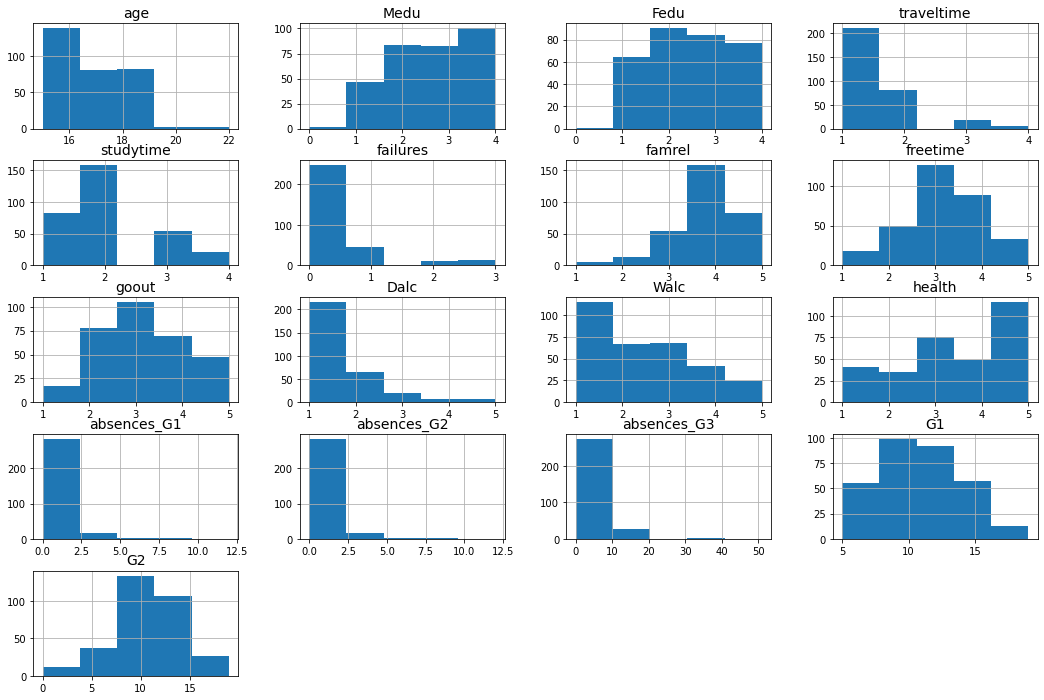

In [125]:
train_data=pd.concat([X_train,y_train],axis=1)
num=train_data[['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout',
  'Dalc','Walc','health','absences_G1','absences_G2','absences_G3','G1','G2']]

import matplotlib.pyplot as plt
plt.rc('font', size=100)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
num.hist(bins=5,figsize=(18,12))
plt.show()

### Next, a scatter plot was done on the training set continuous numerical attributes against the G3 score. As expected, G2 and G3 score positively correlates with the G3 score. Surprisingly, the trend is not seen with the absences. However, we will include these attributes in the prediction model to see if the G3 score can be predicted using them.

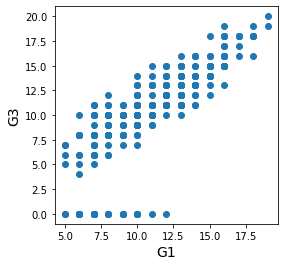

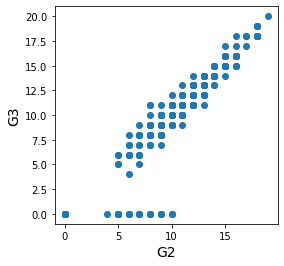

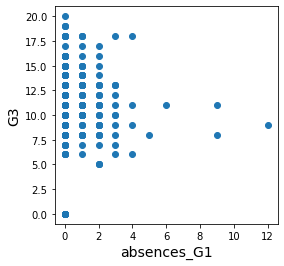

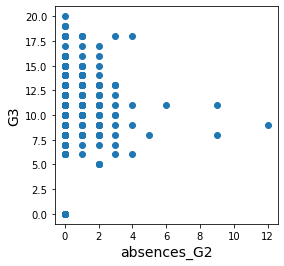

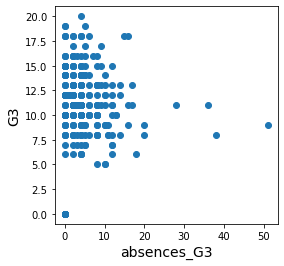

In [126]:
cont_num_columns=['G1','G2','absences_G1','absences_G2','absences_G3']
for col in cont_num_columns:
    plt.figure(figsize=(4,4)) 
    plt.scatter(train_data[col],train_data['G3'])
    plt.xlabel(col)
    plt.ylabel('G3')
    plt.grid=True
    plt.show()

### 
A boxplot was done for the numerical data that is not continuous. 
- age>19, it results in a higher G3 score
- failures>1 results in a lower G3 score

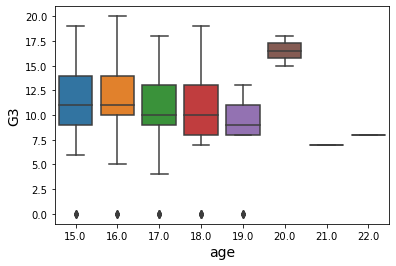

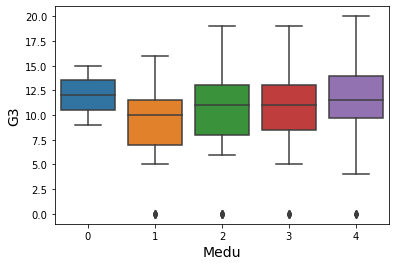

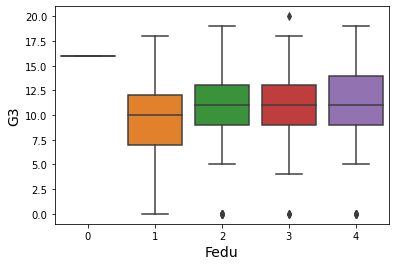

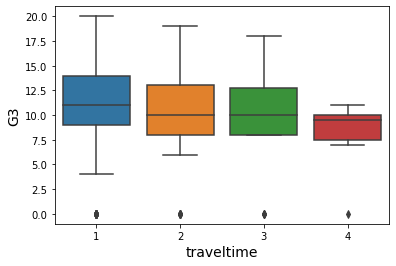

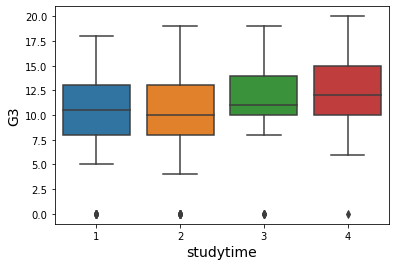

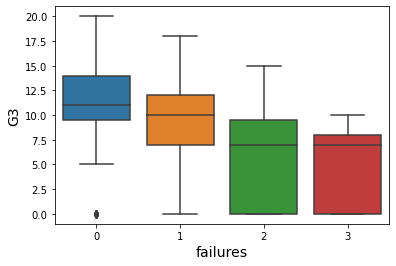

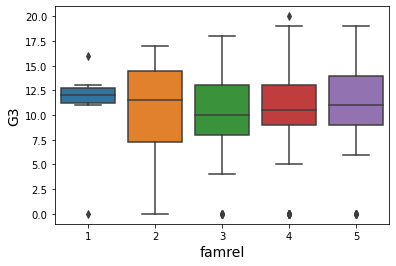

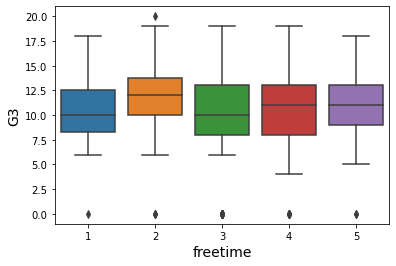

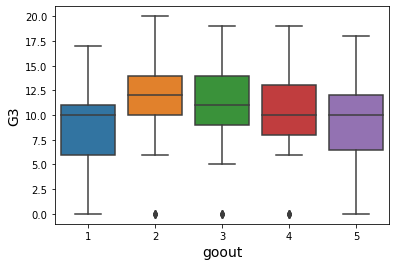

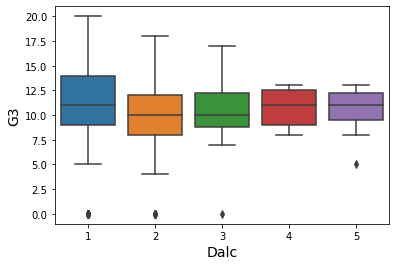

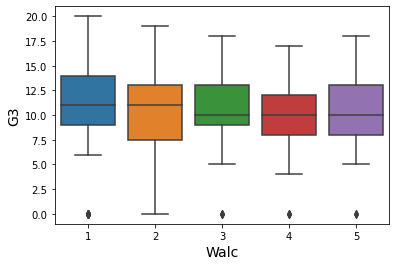

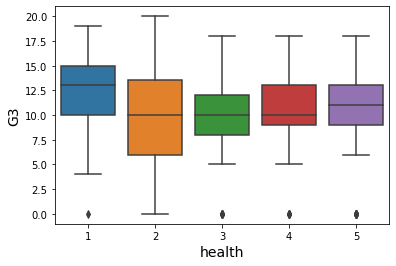

In [127]:
import seaborn as sns
non_cont_num_columns=['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
                      'famrel','freetime', 'goout', 'Dalc', 'Walc', 'health']
for col in non_cont_num_columns:
    sns.boxplot(x=col,y='G3',data=train_data)
    plt.show()

### 
A distibution plot has been done for the categorical data to see how well each category is represented. Note that:
- parent's status being apart is low
- higher education pursued is high

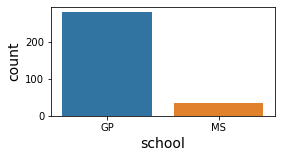

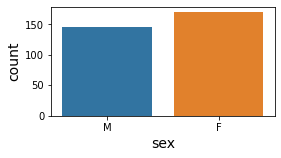

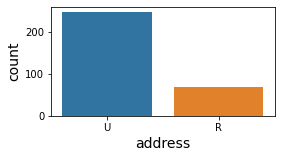

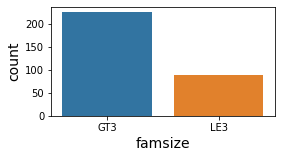

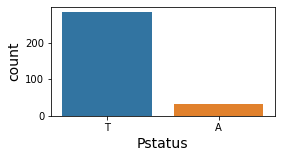

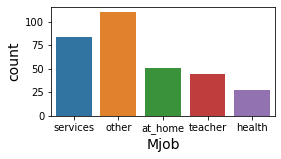

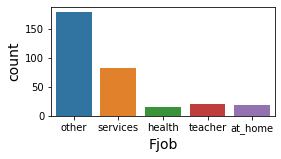

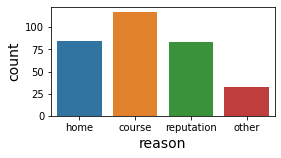

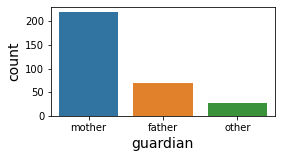

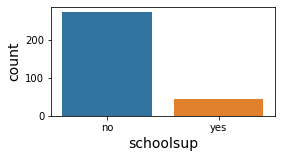

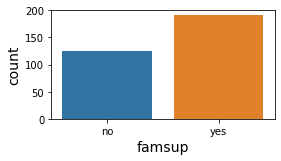

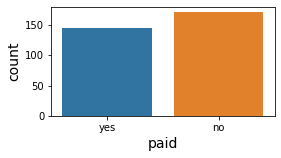

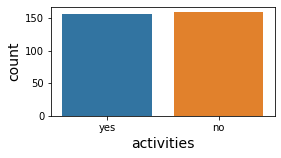

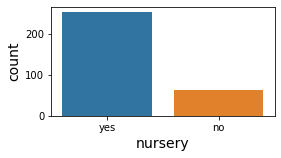

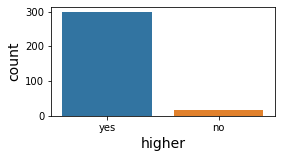

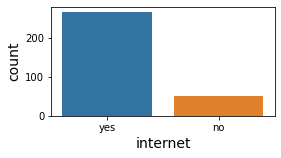

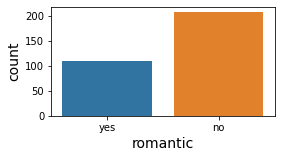

In [128]:
cat_col=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']
import seaborn as sns
for col in cat_col:
    plt.figure(figsize=(4,2))
    sns.countplot(x=col,data=train_data)
    plt.show()

For categorical data, a box plot against the G3 score was performed. A low G3_score results when:
- rural addresses
- not pursuing higher education
- no internet 

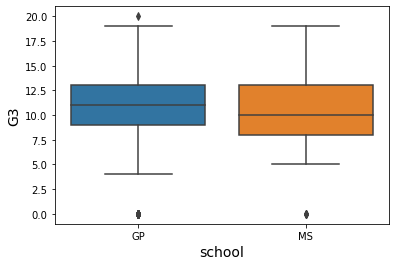

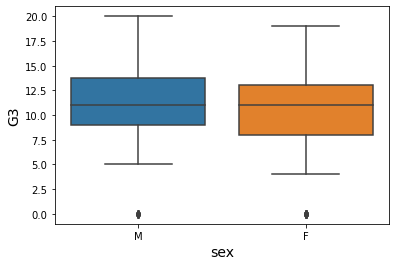

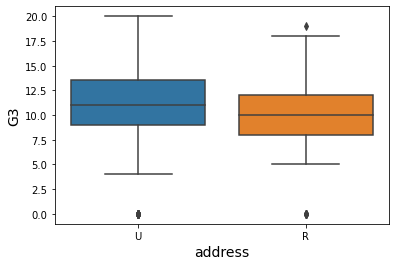

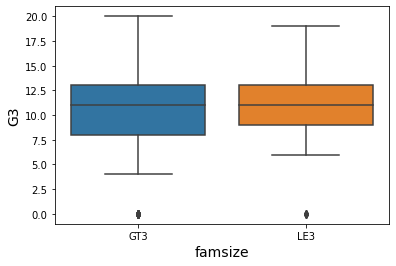

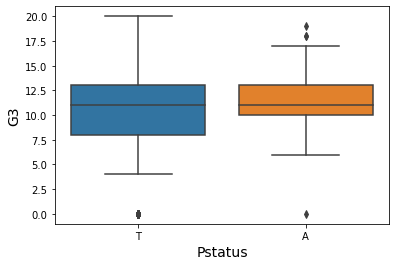

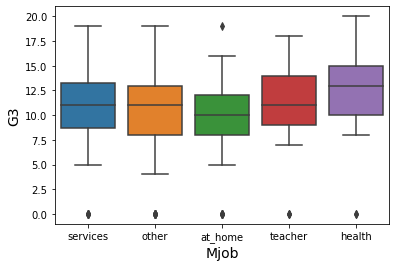

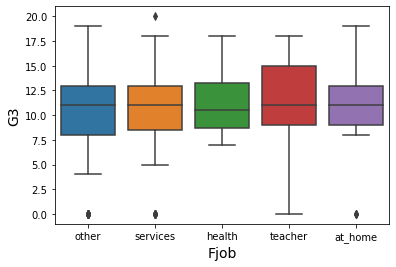

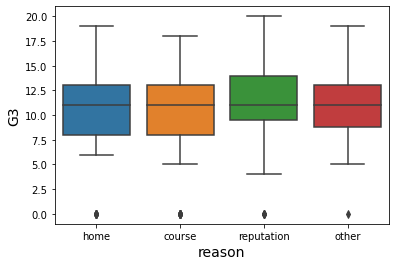

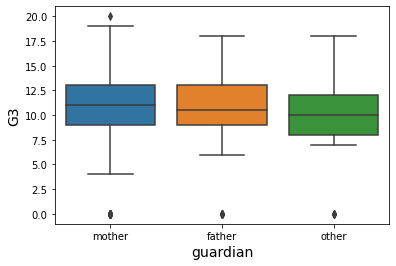

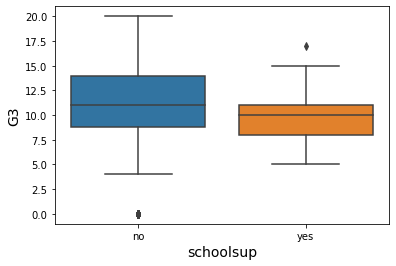

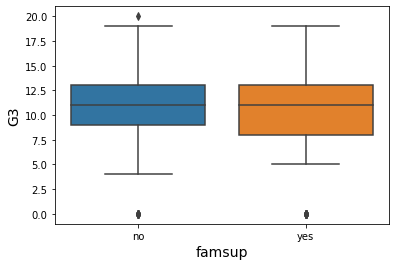

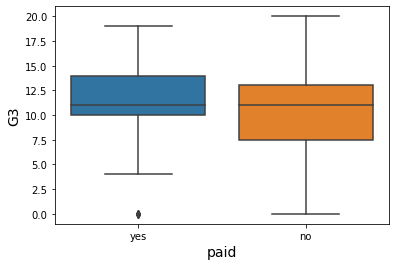

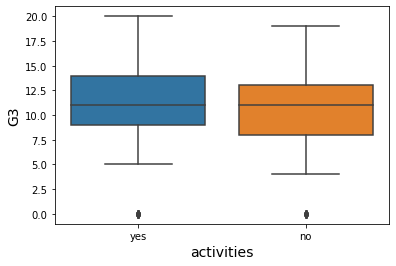

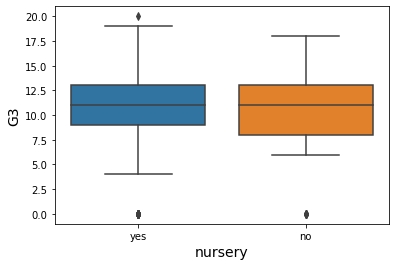

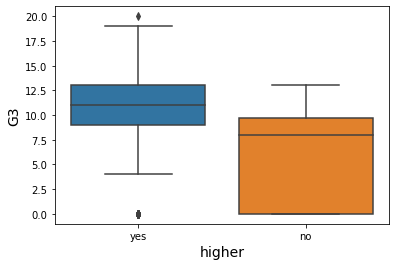

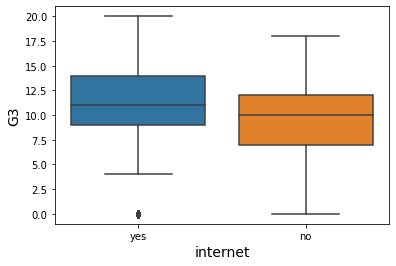

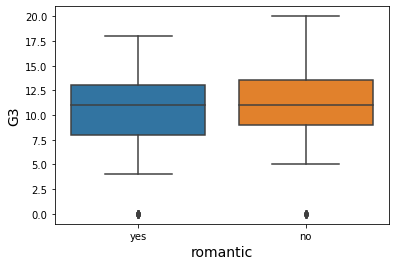

In [129]:
for col in cat_col:
    sns.boxplot(x=col,y='G3',data=train_data)
    plt.show()

The following attributes most likely affect the G3 scores:
- failures
- age
- address
- higher
- internet
- absences_G1
- absences_G2
- absences_G3

### Study the correlation between attributes
The correlation for the numerical values are shown in a heatmap. Note that a higher correlation is seen with a lighter color. The following attributes were identified:
- G1
- G2

In [130]:
corr_matrix=num.corr()
corr_matrix

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2
age,1.000000,-0.172035,-0.195360,0.014211,0.028938,0.237423,0.029536,0.000450,0.075913,0.105923,0.076030,-0.070152,0.140406,0.140406,0.172297,-0.025149,-0.103116
Medu,-0.172035,1.000000,0.615004,-0.178514,0.056176,-0.246962,-0.025834,0.018264,0.103830,0.032531,-0.004591,-0.055000,0.086274,0.086274,0.091383,0.214130,0.209480
Fedu,-0.195360,0.615004,1.000000,-0.171039,-0.021699,-0.262897,-0.030593,-0.018917,0.055851,0.006518,0.001523,0.005705,0.021087,0.021087,0.008273,0.185237,0.148808
traveltime,0.014211,-0.178514,-0.171039,1.000000,-0.129264,0.090092,0.055934,-0.003145,0.041376,0.132658,0.135403,0.060168,0.014724,0.014724,-0.008156,-0.078742,-0.151731
studytime,0.028938,0.056176,-0.021699,-0.129264,1.000000,-0.129183,0.089408,-0.138686,-0.103158,-0.212241,-0.290409,-0.058622,-0.046094,-0.046094,-0.027807,0.202975,0.153854
failures,0.237423,-0.246962,-0.262897,0.090092,-0.129183,1.000000,-0.038807,0.096669,0.119094,0.143339,0.117970,0.058087,0.017470,0.017470,-0.003298,-0.346077,-0.335638
famrel,0.029536,-0.025834,-0.030593,0.055934,0.089408,-0.038807,1.000000,0.147336,0.092571,-0.079385,-0.101748,0.082195,-0.005119,-0.005119,-0.036326,0.023186,-0.001208
freetime,0.000450,0.018264,-0.018917,-0.003145,-0.138686,0.096669,0.147336,1.000000,0.358152,0.211844,0.173280,0.077612,-0.083539,-0.083539,-0.088831,0.003468,-0.034777
goout,0.075913,0.103830,0.055851,0.041376,-0.103158,0.119094,0.092571,0.358152,1.000000,0.302963,0.449318,0.031221,-0.022131,-0.022131,-0.002238,-0.137178,-0.152699
Dalc,0.105923,0.032531,0.006518,0.132658,-0.212241,0.143339,-0.079385,0.211844,0.302963,1.000000,0.635746,0.097164,0.105918,0.105918,0.131403,-0.093415,-0.066438


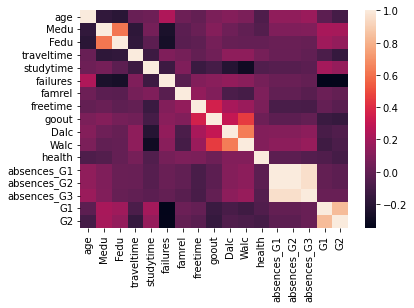

In [131]:
corr_matrix=num.corr()
sns.heatmap(corr_matrix)
plt.show()

## Prepare the Data

### Feature Selection
We want to select only the features that have an impact on the G3 score. A function has been created that selects the best numerical attributes based on a correlation of +/-0.70 for contunous numerical data which gives G1 and G2. We will also investigate the other attributes chosen above.

In [132]:
#Based on the visualizations we did above, other attributes were chosen too. A preview of what that dataframe
#looks like has been shown for reference.

attributes=['age','address','failures','higher','absences_G1',
           'absences_G2','absences_G3','G1','G2']
X_train_select=X_train[attributes]
X_train_select.head(1)

,age,address,failures,higher,absences_G1,absences_G2,absences_G3,G1,G2
181,16.0,U,0,yes,0.0,0.0,2.0,12,13


### Make pipelines to handle data preparation

In [133]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

### Custom Transformer
- Creates a new column that sums the absences_G1, absences_G2 and absences_G3 and drops the 3 columns
- has a parameter when equal to True drops G1/G2 columns

In [134]:
from sklearn.base import BaseEstimator, TransformerMixin

ab_1, ab_2, ab_3 = 1,2,3

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, drop=True): 
        self.drop = drop

    def fit(self, X, y=None): 
        return self 
    
    def transform(self, X):
        ab_sum = X[:, ab_1]+X[:, ab_2]+X[:, ab_3]
        X=np.delete(X,[ab_1,ab_2,ab_3],axis=1)
        if self.drop:
            X=np.delete(X,[1,2],axis=1)
            return np.c_[X, ab_sum]
        else:
            return np.c_[X,ab_sum]

### Fill in missing values with the median

### Feature scaling on numeric data in pipeline

In [135]:
num_pipeline_True = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), 
        ('attribs_adder', CombinedAttributesAdder(drop=True)), 
        ('std_scaler', StandardScaler()),
    ])
num_pipeline_False = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), 
        ('attribs_adder', CombinedAttributesAdder(drop=False)), 
        ('std_scaler', StandardScaler()),
    ])

num_att = ['age','absences_G1','absences_G2','absences_G3','G1','G2']

### Convert categorical data to numerical values so they can be modeled.

In [136]:
cat_pipeline=make_pipeline(
    OneHotEncoder(drop='first', sparse_output=False))
cat_att=['address','higher']

### Ensure that these values have a numerical order when scaled

In [137]:
ord_pipeline=make_pipeline(
    OrdinalEncoder())

ord_att=['failures']

### Create a transformer to transform all types of attributes in one step.

In [138]:
from sklearn.compose import ColumnTransformer

# create full pipeline
preprocessing_True = ColumnTransformer([
        ("num", num_pipeline_True, num_att),
    ("cat", cat_pipeline, cat_att),
    ("ord", ord_pipeline, ord_att),
])
preprocessing_False= ColumnTransformer([
        ("num", num_pipeline_False, num_att),
    ("cat", cat_pipeline, cat_att),
    ("ord", ord_pipeline, ord_att),
])

### Data has been transformed with the attributes G1 and G2 are dropped.

In [139]:
X_train_transformed_True = preprocessing_True.fit_transform(X_train_select)
X_train_transformed_True.shape

(316, 5)

### Data has been transformed with the attributes G1 and G2 kept.

In [140]:
X_train_transformed_False = preprocessing_False.fit_transform(X_train_select)
X_train_transformed_False.shape

(316, 7)

## Shortlist promising models

### Let's pick a few models to use for our transform our training data. I have picked six models that are commonly used to model data.

In [141]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm_True=lm.fit(X_train_transformed_True,y_train)
lm_False=lm.fit(X_train_transformed_False,y_train)

from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(max_iter=10000, penalty=None, learning_rate='constant',n_iter_no_change=100)
sgd_True=sgd.fit(X_train_transformed_True,y_train) 
sgd_False=sgd.fit(X_train_transformed_False,y_train)

from sklearn.linear_model import Ridge
ridge=Ridge()
ridge_True=ridge.fit(X_train_transformed_True,y_train) 
ridge_False=ridge.fit(X_train_transformed_False,y_train)

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt_True=dt.fit(X_train_transformed_True,y_train)
dt_False=dt.fit(X_train_transformed_False,y_train)

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf_True=rf.fit(X_train_transformed_True,y_train)
rf_False=rf.fit(X_train_transformed_False,y_train)

from sklearn.linear_model import Lasso
ls=Lasso(alpha=1)
ls_True=ls.fit(X_train_transformed_True,y_train)
ls_False=ls.fit(X_train_transformed_False,y_train)

from sklearn.svm import LinearSVR
svm=LinearSVR()
svm_True=svm.fit(X_train_transformed_True,y_train)
svm_False=svm.fit(X_train_transformed_False,y_train)

from sklearn.linear_model import ElasticNet
el = ElasticNet()
el_True=el.fit(X_train_transformed_True,y_train)
el_False=el.fit(X_train_transformed_False,y_train)

### All 7 models were compared with a cross validation where the training data  was checked 5 times on how accurate it was on fitting the model. We will get 5 scores for each model for both types of data being fit. The root mean squared error is being checked - the lower it is, the better our model is.

In [142]:
from sklearn.model_selection import cross_val_score

lm_True_cvs = -cross_val_score(lm_True, X_train_transformed_True,y_train,scoring="neg_root_mean_squared_error",cv=5)
lm_False_cvs= -cross_val_score(lm_False, X_train_transformed_False,y_train,scoring="neg_root_mean_squared_error", cv=5)

sgd_True_cvs = -cross_val_score(sgd_True, X_train_transformed_True,y_train,scoring="neg_root_mean_squared_error",cv=5)
sgd_False_cvs= -cross_val_score(sgd_False, X_train_transformed_False,y_train,scoring="neg_root_mean_squared_error", cv=5)

ridge_True_cvs = -cross_val_score(ridge_True, X_train_transformed_True,y_train,scoring="neg_root_mean_squared_error",cv=5)
ridge_False_cvs= -cross_val_score(ridge_False, X_train_transformed_False,y_train,scoring="neg_root_mean_squared_error", cv=5)

dt_True_cvs = -cross_val_score(dt_True, X_train_transformed_True,y_train,scoring="neg_root_mean_squared_error",cv=5)
dt_False_cvs= -cross_val_score(dt_False, X_train_transformed_False,y_train,scoring="neg_root_mean_squared_error",cv=5)

rf_True_cvs = -cross_val_score(rf_True, X_train_transformed_True,y_train,scoring="neg_root_mean_squared_error" ,cv=5)
rf_False_cvs= -cross_val_score(rf_False, X_train_transformed_False,y_train,scoring="neg_root_mean_squared_error", cv=5)

ls_True_cvs = -cross_val_score(ls_True, X_train_transformed_True,y_train,scoring="neg_root_mean_squared_error", cv=5)
ls_False_cvs= -cross_val_score(ls_False, X_train_transformed_False,y_train,scoring="neg_root_mean_squared_error", cv=5)

svm_True_cvs = -cross_val_score(svm_True, X_train_transformed_True,y_train,scoring="neg_root_mean_squared_error", cv=5)
svm_False_cvs= -cross_val_score(svm_False, X_train_transformed_False,y_train,scoring="neg_root_mean_squared_error", cv=5)

el_True_cvs = -cross_val_score(el_True, X_train_transformed_True,y_train,scoring="neg_root_mean_squared_error", cv=5)
el_False_cvs= -cross_val_score(el_False, X_train_transformed_False,y_train,scoring="neg_root_mean_squared_error", cv=5)

In [143]:
models=['Linear Regression','SGD','Ridge','Decision Tree','Random Forest','Lasso','SVM','EL']
mean_True=[round(lm_True_cvs.mean(),4),round(sgd_True_cvs.mean(),4),round(ridge_True_cvs.mean(),4),round(dt_True_cvs.mean(),4),round(rf_True_cvs.mean(),4),round(ls_True_cvs.mean(),4),round(svm_True_cvs.mean(),4),round(el_True_cvs.mean(),4)]
mean_False=[round(lm_False_cvs.mean(),4),round(sgd_False_cvs.mean(),4),round(ridge_False_cvs.mean(),4),round(dt_False_cvs.mean(),4),round(rf_False_cvs.mean(),4),round(ls_False_cvs.mean(),4),round(svm_False_cvs.mean(),4),round(el_False_cvs.mean(),4)]

std_True=[round(lm_True_cvs.std(),4),round(sgd_True_cvs.std(),4),round(ridge_True_cvs.std(),4),round(dt_True_cvs.std(),4),round(rf_True_cvs.std(),4),round(ls_True_cvs.std(),4),round(svm_True_cvs.std(),4),round(el_True_cvs.std(),4)]
std_False=[round(lm_False_cvs.std(),4),round(sgd_False_cvs.std(),4),round(ridge_False_cvs.std(),4),round(dt_False_cvs.std(),4),round(rf_False_cvs.std(),4),round(ls_False_cvs.std(),4),round(svm_False_cvs.std(),4), round(el_False_cvs.std(),4)]

print('Mean without G1/G2',dict(zip(models,mean_True)))
print("----------")
print('Mean with G1/G2',dict(zip(models,mean_False)))
print("----------")
print('Variance without G1/G2',dict(zip(models,std_True)))
print("----------")
print('Variance with G1/G2',dict(zip(models,std_False)))

Mean without G1/G2 {'Linear Regression': 4.299, 'SGD': 4.3249, 'Ridge': 4.2963, 'Decision Tree': 4.5784, 'Random Forest': 4.2268, 'Lasso': 4.4569, 'SVM': 4.3205, 'EL': 4.4041}
----------
Mean with G1/G2 {'Linear Regression': 1.8689, 'SGD': 1.8686, 'Ridge': 1.8673, 'Decision Tree': 2.2328, 'Random Forest': 1.6383, 'Lasso': 2.1578, 'SVM': 1.9764, 'EL': 2.3868}
----------
Variance without G1/G2 {'Linear Regression': 0.307, 'SGD': 0.3664, 'Ridge': 0.3046, 'Decision Tree': 0.6773, 'Random Forest': 0.389, 'Lasso': 0.3818, 'SVM': 0.3598, 'EL': 0.381}
----------
Variance with G1/G2 {'Linear Regression': 0.2119, 'SGD': 0.2159, 'Ridge': 0.2135, 'Decision Tree': 0.0771, 'Random Forest': 0.2117, 'Lasso': 0.2767, 'SVM': 0.2452, 'EL': 0.2935}


## Fine-Tune the system

### The mean error was lowest in random forest regressor for both with and without the G1/G2 columns for the transformed data. The variance was comparably low. Based upon this, RandomForestRegressor is the best model to be used.

In [144]:
from sklearn.model_selection import GridSearchCV

rf_param_grid = {'n_estimators': [50,75,100,125,150],
                 'max_leaf_nodes': [2,4,6,8],
                 'max_depth':[3,5,7,9]}

grid_search_cv_rf = GridSearchCV(rf,rf_param_grid, verbose=1, cv=10)

true=grid_search_cv_rf.fit(X_train_transformed_True, y_train)
rf_model_True=true.best_estimator_
print("The best parameters without G1/G2 are: ", true.best_params_)

#The best RandomForestRegressor fit with the optimized hyperparameters have been done to fit the transformed 
#training data where the G1/G2 columns are dropped.

Fitting 10 folds for each of 80 candidates, totalling 800 fits
The best parameters without G1/G2 are:  {'max_depth': 7, 'max_leaf_nodes': 8, 'n_estimators': 50}


In [145]:
false=grid_search_cv_rf.fit(X_train_transformed_False, y_train)
rf_model_False=false.best_estimator_
print("The best parameters with G1/G2 are: ", false.best_params_)

#The best RandomForestRegressor fit with the optimized hyperparameters have been done to fit the transformed 
#training data where the G1/G2 columns are kept.

Fitting 10 folds for each of 80 candidates, totalling 800 fits
The best parameters with G1/G2 are:  {'max_depth': 5, 'max_leaf_nodes': 8, 'n_estimators': 50}


### Transform testing data using model selected with best hyperparameters for both models.

In [146]:
X_test_transformed_True = preprocessing_True.transform(X_test)
X_test_transformed_False = preprocessing_False.transform(X_test)

### The performance of the model for both conditions are seen below.

In [147]:
true_pred=rf_model_True.predict(X_test_transformed_True)
rmse_true=round(mean_squared_error(y_test,true_pred)**0.5,4)
r2_true=round(r2_score(y_test, true_pred),4)

false_pred=rf_model_False.predict(X_test_transformed_False)
rmse_false=round(mean_squared_error(y_test,false_pred)**0.5,4)
r2_false=round(r2_score(y_test, false_pred),4)

print(f"RMSE (without G1/G2 columns): {rmse_true}")
print(f"RMSE (with G1/G2 columns): {rmse_false}")
print("----------")
print(f"R-squared (without G1/G2 columns): {r2_true}")
print(f"R-squared (with G1/G2 columns): {r2_false}")

RMSE (without G1/G2 columns): 4.1609
RMSE (with G1/G2 columns): 1.8453
----------
R-squared (without G1/G2 columns): 0.1557
R-squared (with G1/G2 columns): 0.8339


## Presenting the solution

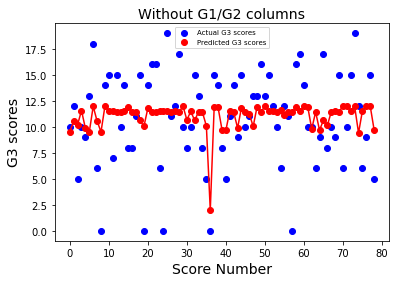

In [148]:
number=range(len(y_test))
plt.scatter(number, y_test, color='blue', label='Actual G3 scores')
plt.scatter(number, true_pred, color='red', label='Predicted G3 scores')
plt.xlabel('Score Number')
plt.ylabel('G3 scores')
plt.title('Without G1/G2 columns')
plt.legend(prop={'size': 7})
plt.plot(number, true_pred, "r-", label="Predictions")
plt.show()

#A scatterplot has been presented to see how the predicted G3 scores compare with the actual G3 scores
#when the G1/G2 scores are not used.


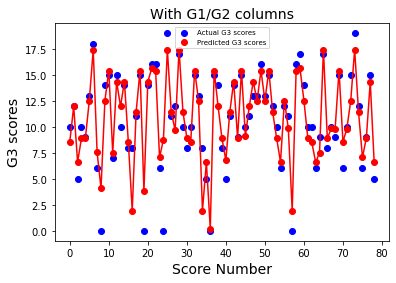

In [149]:
plt.scatter(number, y_test, color='blue', label='Actual G3 scores')
plt.scatter(number, false_pred, color='red', label='Predicted G3 scores')
plt.xlabel('Score Number')
plt.ylabel('G3 scores')
plt.title('With G1/G2 columns')
plt.legend(prop={'size': 7})
plt.plot(number, false_pred, "r-", label="Predictions")
plt.show()

#A scatterplot has been presented to see how the predicted G3 scores compare with the actual G3 scores
#when the G1/G2 scores are used. 

### Conclusion

We attempted to build a model where the G3 score can be predicted without the G1/G2 scores. In this way, we can identify what students need help before we get the G1/G2 scores. This would be of great service to students and the community in general. 
The model we built with RandomForestRegressor may not be the best when it comes to predicting G3 scores as our R2 values was low. Comparably, the model with the G1/G2 scores was better at predicting G1/G2 scores as our R2 value was >0.80. For the moment, we should use G1/G2 to decide what sutdents need help for their final G3 exam.

However, the question arises; how can we improve this model? We will have to go back to the hyperparameters that we chosen and probably add more categories to improve it. This will take more processing time but will be worth it in the long run. Also, we will have to look at what attributes to choose to our model and what to drop. We may have chosen too little attributes.
Another question that arises is if the training data needs further processing. Should some other processing be done for the data, before we add it to the model? 

The positive is that we have identified several models to be used that can be adjusted to see if they are a better model for this data. The model that we used may improve if we get additional data from other school as more data can improve the model so there are direct trends. 
